In [ ]:
!nvidia-smi

Mon Jul 19 09:32:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls  "/content/drive/MyDrive/newClasses/newClasses"


catamaran  no_Ship  sailboat  ship  yacht


In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

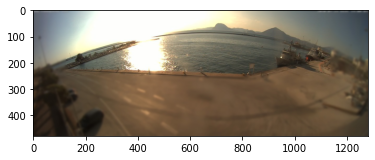

In [ ]:
%matplotlib inline
pil_im = Image.open('/content/drive/MyDrive/NewDataset/boatDetection/blurred_img/001_1595519924_original_panorama.jpg', 'r')
imshow(np.asarray(pil_im))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,load_model
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import plot_model
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time

batch_size = 20

train_data_dir = '/content/drive/MyDrive/Machine Learning/newClasses/newClasses'
validation_data_dir = '/content/drive/MyDrive/Machine Learning/newClasses/newClasses'


ImportError: ignored

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)


train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(100, 100),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(100, 100),
        batch_size=30,
        class_mode='categorical',
        subset='validation')

Found 580 images belonging to 5 classes.
Found 141 images belonging to 5 classes.


In [ ]:
# MODEL --------------------------------------------------

model =Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

In [ ]:
# TRAINING --------------------------------------------------
#54 step and 21 batch  are good numbers so 38+30
epochs = 210
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive//newClasses/weights.hdf5', save_weights_only=False,
    monitor='acc',verbose=1,mode='auto',save_best_only=True)

history = model.fit(
        train_generator,
        steps_per_epoch= 29,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=29,
        callbacks=[checkpointer]
)


Epoch 1/210
29/29 [==============================] - 7s 229ms/step - loss: 1.0651 - acc: 0.5190 - val_loss: 1.0177 - val_acc: 0.6525

Epoch 00001: acc improved from -inf to 0.51897, saving model to /content/drive/MyDrive/diplomatiki/newClasses/weights.hdf5
Epoch 2/210
29/29 [==============================] - 5s 178ms/step - loss: 1.0647 - acc: 0.5741

Epoch 00002: acc improved from 0.51897 to 0.57414, saving model to /content/drive/MyDrive/diplomatiki/newClasses/weights.hdf5
Epoch 3/210
29/29 [==============================] - 5s 176ms/step - loss: 1.0243 - acc: 0.5810

Epoch 00003: acc improved from 0.57414 to 0.58103, saving model to /content/drive/MyDrive/diplomatiki/newClasses/weights.hdf5
Epoch 4/210
29/29 [==============================] - 5s 178ms/step - loss: 1.0380 - acc: 0.5793

Epoch 00004: acc did not improve from 0.58103
Epoch 5/210
29/29 [==============================] - 5s 182ms/step - loss: 1.0508 - acc: 0.5345

Epoch 00005: acc did not improve from 0.58103
Epoch 6/210

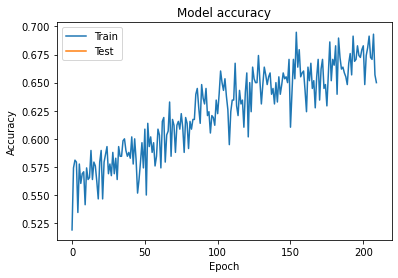

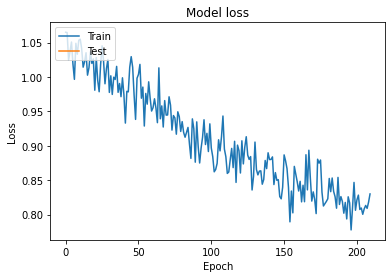

In [ ]:
#Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from keras.models import Sequential,load_model

#from matplotlib.pyplot import imshow
#import numpy as np
#from PIL import Image
model = load_model('/content/drive/MyDrive/diplomatiki/newClasses/weights.hdf5')






5523


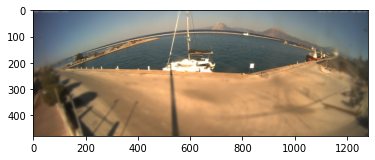

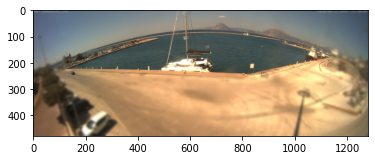

2
Sailboat


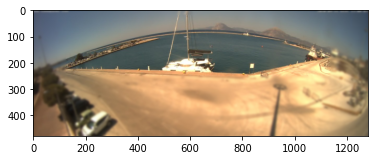

2
Sailboat


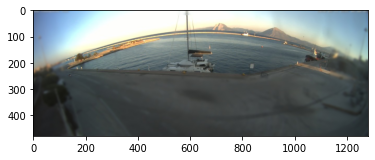

1
no_Ship


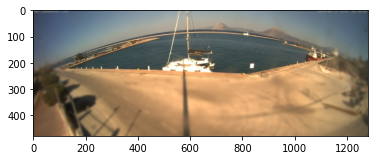

2
Sailboat


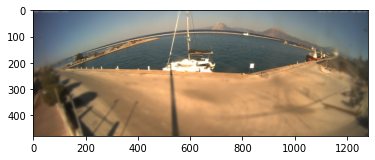

2
Sailboat


In [ ]:

import os
local_download_path='/content/drive/MyDrive/NewDataset/boatDetection/blurred_img'
file_paths = []

for folder, subs, files in os.walk(local_download_path):
  for filename in files:
    file_paths.append(os.path.abspath(os.path.join(folder, filename)))

print(len(file_paths))

pil_im = Image.open(file_paths[1], 'r')
imshow(np.asarray(pil_im))
#3000+3005
step_in_path=range(3000,3005)
#print (step_in_path)
for n in step_in_path:
  pil_im = Image.open(file_paths[n], 'r')
  imshow(np.asarray(pil_im))


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def numbersPrediction_to_class(argument): 
  switcher = { 
        0: "Catamaran", 
        1: "no_Ship", 
        2: "Sailboat", 
        3: "Ship",
        4: "yacht",
        
    }
    # get() method of dictionary data type returns  
    # value of passed argument if it is present  
    # in dictionary otherwise second argument will 
    # be assigned as default value of passed argument 
  return switcher.get(argument, "Not in class")  


def process(filename: str=None) -> None:
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = mpimg.imread(filename)
   
    imageDetection=np.array((Image.open(file_paths[file])).resize((100,100))).reshape(1,100,100,3)/255
    #prediction=model.predict_classes([imageDetection])
    prediction=np.argmax(model.predict([imageDetection]), axis=-1)
    
    plt.figure()
    plt.imshow(image)
    plt.show()
    print(prediction[0])
    print(numbersPrediction_to_class(prediction[0]))
    #print(prediction, "is of type", type(prediction))
    
    

    
    

for file in step_in_path:
    process(file_paths[file]) 
    

[1]
no_Ship


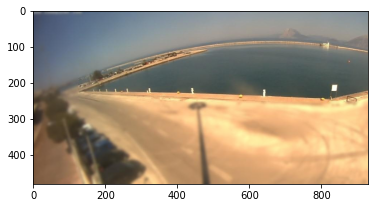

In [ ]:
#This is a no_ship image
pil_im = Image.open('/content/drive/MyDrive/newClasses/newClasses/no_Ship/blurred_img1073.jpg', 'r')
imshow(np.asarray(pil_im))


no_ship1=np.array((Image.open('/content/drive/MyDrive/newClasses/newClasses/no_Ship/blurred_img1073.jpg')).resize((100,100))).reshape(1,100,100,3)/255
#predictionBuoy=model.predict_classes([buoy1])
prediction=np.argmax(model.predict([no_ship1]), axis=-1)

print(prediction)
print(numbersPrediction_to_class(prediction[0]))




[3]
Ship


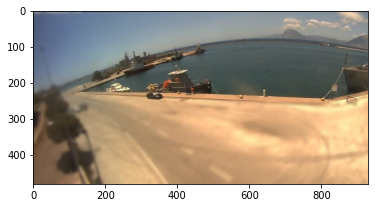

In [ ]:
#This is a ship image
pil_im = Image.open('/content/drive/MyDrive/newClasses/newClasses/ship/blurred_img1092.jpg', 'r')
imshow(np.asarray(pil_im))


ship1=np.array((Image.open('/content/drive/MyDrive/newClasses/newClasses/ship/blurred_img1092.jpg')).resize((100,100))).reshape(1,100,100,3)/255

prediction=np.argmax(model.predict([ship1]), axis=-1)

print(prediction)
print(numbersPrediction_to_class(prediction[0]))




[4]
yacht


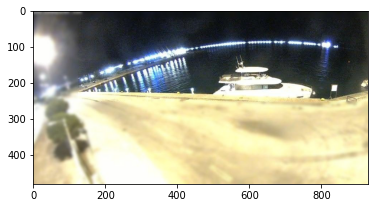

In [ ]:
#This is a yacht image
pil_im = Image.open('/content/drive/MyDrive/newClasses/newClasses/yacht/blurred_img837.jpg', 'r')
imshow(np.asarray(pil_im))


yacht1=np.array((Image.open('/content/drive/MyDrive/newClasses/newClasses/yacht/blurred_img837.jpg')).resize((100,100))).reshape(1,100,100,3)/255

prediction=np.argmax(model.predict([yacht1]), axis=-1)

print(prediction)
print(numbersPrediction_to_class(prediction[0]))



[2]
This photo belongs to sailboat class


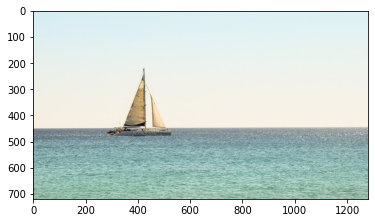

In [ ]:
filepath='/content/drive/MyDrive/Dataset/boat-types-recognition/sailboat/catamaran-boat-vessel-sea-travel-2288349.jpg'
pil_im = Image.open(filepath, 'r')
imshow(np.asarray(pil_im))

sailboat=np.array((Image.open(filepath)).resize((100,100))).reshape(1,100,100,3)/255
#prediction=model.predict_classes([sailboat])
prediction=np.argmax(model.predict([sailboat]), axis=-1)
print(prediction)
if prediction==2:
  print("This photo belongs to sailboat class")

In [ ]:
!ls  "/content/drive/MyDrive/newClasses/newClasses"


catamaran  no_Ship  sailboat  ship  yacht
